## Trực quan hóa dữ liệu

## Mục lục
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
    - [2. Câu hỏi 2](#iv2)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
    - [5. Câu hỏi 5](#iv5)
    - [6. Câu hỏi 6](#iv6)
    - [7. Câu hỏi 7](#iv7)
    - [8. Câu hỏi 8](#iv8)
    - [9. Câu hỏi 9](#iv9)
    - [10. Câu hỏi 10](#iv10)

In [12]:
# Các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import csv

from sklearn.linear_model import LinearRegression

In [13]:
# Đọc file csv
df = pd.read_csv('../dataset/Defined_salary.csv')
df.head()

,Location,Experience,Job Level,Industry,Employment Type,Welfare,Job Requirements,Follower,Salary
0,Hai Duong,0.0,Employee,"['accounting', 'auditing', 'statistics']",Official,"['laptop', 'insurance', 'travel', 'allowance',...","{'ms', 'major', 'characteristics', 'excel', 'l...",376,9000000
1,Long An,1.0,Employee,"['maintenance', 'repair']",Official,"['laptop', 'insurance', 'travel', 'allowance',...","{'given', 'college', 'priority', 'refrigeratio...",258,13500000
2,Ha Noi,1.5,Employee,"['marketing', 'sales', 'importexport']",Official,"['insurance', 'travel', 'allowance', 'bonus', ...","{'ability', 'measurement', 'years', 'manage', ...",48,18800000
3,Ho Chi Minh,5.0,Manager,"['interior', 'exterior']",Official,"['insurance', 'travel', 'bonus', 'health', 'ca...","{'check', 'flexible', 'levelhaving', 'understa...",19510,31200000
4,Ho Chi Minh,1.5,Employee,"['interior', 'exterior', 'architecture', 'cons...",Official,"['insurance', 'travel', 'allowance', 'overseas...","{'assigned', 'board', 'prices', 'understanding...",457,13000000


In [14]:
# Danh sách 63 tỉnh/thành phố của Việt Nam
valid_locations = [
    "An Giang", "Bà Rịa - Vũng Tàu", "Bạc Liêu", "Bắc Kạn", "Bắc Giang", "Bắc Ninh",
    "Bến Tre", "Bình Dương", "Bình Định", "Bình Phước", "Bình Thuận", "Cà Mau",
    "Cần Thơ", "Cao Bằng", "Đà Nẵng", "Đắk Lắk", "Đắk Nông", "Điện Biên",
    "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Nội", "Hà Tĩnh",
    "Hải Dương", "Hải Phòng", "Hòa Bình", "Hậu Giang", "Hoà Bình", "Hồ Chí Minh",
    "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lạng Sơn",
    "Lào Cai", "Long An", "Nam Định", "Nghệ An", "Ninh Bình", "Ninh Thuận",
    "Phú Thọ", "Phú Yên", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh",
    "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh", "Thái Bình", "Thái Nguyên",
    "Thanh Hóa", "Thừa Thiên - Huế", "Tiền Giang", "Trà Vinh", "Tuyên Quang",
    "Vĩnh Long", "Vĩnh Phúc", "Yên Bái"
]

In [15]:
# In ra cột 'Location' của dataframe không lặp lại
print(df['Location'].unique())

['Hai Duong' 'Long An' 'Ha Noi' 'Ho Chi Minh' 'Binh Duong' 'Đong Nai'
 'Quang Ngai' 'Vinh Long' 'Lam Đong' 'Can Tho' 'Bac Ninh' 'Dak Lak'
 'Gia Lai' 'Bac Giang' 'Binh Thuan' 'Tay Ninh' 'Ba Ria - Vung Tau'
 'Ha Nam' 'Thai Binh' 'Bac Lieu' 'Thanh Hoa' 'Binh Đinh' 'Tra Vinh'
 'Hoa Binh' 'Đa Nang' 'Hung Yen' 'Hai Phong' 'Kien Giang' 'Vinh Phuc'
 'Ha Giang' 'Tuyen Quang' 'Đien Bien' 'Nam Đinh' 'Lang Son'
 'Kv Đong Nam Bo' 'Nghe An' 'Quang Tri' 'Quang Ninh' 'Ninh Thuan'
 'Đong Thap' 'Quang Nam' 'Thua Thien- Hue' 'Tien Giang' 'Khanh Hoa'
 'Toan Quoc' 'Phu Yen' 'Quang Binh' 'Hau Giang' 'Binh Phuoc' 'Phu Tho'
 'Svay Rieng' 'Ninh Binh' 'Thai Nguyen' 'Bac Can' 'Son La' 'Ha Tinh'
 'Yen Bai' 'Ca Mau' 'An Giang' 'Ben Tre' 'Lao Cai' 'Soc Trang' 'Khac'
 'Đong Bang Song Cuu Long' 'Quoc Te' 'Cao Bang' 'Dak Nong' 'Tokyo'
 'Kon Tum' 'Xiangkhouang' 'Champasak' 'Yokohama' 'Hokkaido'
 'Kv Tay Nguyen' 'Malaysia' 'Kv Bac Trung Bo' 'Bangkok' 'Kratie'
 'Kv Nam Trung Bo' 'Lai Chau' 'Phnompenh']


In [16]:
# Tạo từ điển ánh xạ tên địa điểm sang tiếng Việt chuẩn
city_to_vietnamese = {
    "Hai Duong": "Hải Dương",
    "Long An": "Long An",
    "Ha Noi": "Hà Nội",
    "Ho Chi Minh": "Thành phố Hồ Chí Minh",
    "Binh Duong": "Bình Dương",
    "Đong Nai": "Đồng Nai",
    "Quang Ngai": "Quảng Ngãi",
    "Vinh Long": "Vĩnh Long",
    "Lam Đong": "Lâm Đồng",
    "Can Tho": "Cần Thơ",
    "Bac Ninh": "Bắc Ninh",
    "Dak Lak": "Đắk Lắk",
    "Gia Lai": "Gia Lai",
    "Bac Giang": "Bắc Giang",
    "Binh Thuan": "Bình Thuận",
    "Tay Ninh": "Tây Ninh",
    "Ba Ria - Vung Tau": "Bà Rịa - Vũng Tàu",
    "Ha Nam": "Hà Nam",
    "Thai Binh": "Thái Bình",
    "Bac Lieu": "Bạc Liêu",
    "Thanh Hoa": "Thanh Hóa",
    "Binh Đinh": "Bình Định",
    "Tra Vinh": "Trà Vinh",
    "Hoa Binh": "Hòa Bình",
    "Đa Nang": "Đà Nẵng",
    "Hung Yen": "Hưng Yên",
    "Hai Phong": "Hải Phòng",
    "Kien Giang": "Kiên Giang",
    "Vinh Phuc": "Vĩnh Phúc",
    "Ha Giang": "Hà Giang",
    "Tuyen Quang": "Tuyên Quang",
    "Đien Bien": "Điện Biên",
    "Nam Dinh": "Nam Định",
    "Lang Son": "Lạng Sơn",
    "Nghe An": "Nghệ An",
    "Quang Tri": "Quảng Trị",
    "Quang Ninh": "Quảng Ninh",
    "Ninh Thuan": "Ninh Thuận",
    "Đong Thap": "Đồng Tháp",
    "Quang Nam": "Quảng Nam",
    "Thua Thien- Hue": "Thừa Thiên - Huế",
    "Tien Giang": "Tiền Giang",
    "Khanh Hoa": "Khánh Hòa",
    "Phu Yen": "Phú Yên",
    "Quang Binh": "Quảng Bình",
    "Hau Giang": "Hậu Giang",
    "Binh Phuoc": "Bình Phước",
    "Phu Tho": "Phú Thọ",
    "Ninh Binh": "Ninh Bình",
    "Thai Nguyen": "Thái Nguyên",
    "Bac Can": "Bắc Cạn",
    "Son La": "Sơn La",
    "Ha Tinh": "Hà Tĩnh",
    "Yen Bai": "Yên Bái",
    "Ca Mau": "Cà Mau",
    "An Giang": "An Giang",
    "Ben Tre": "Bến Tre",
    "Lao Cai": "Lào Cai",
    "Soc Trang": "Sóc Trăng",
    "Cao Bang": "Cao Bằng",
    "Dak Nong": "Đắk Nông",
    "Kon Tum": "Kon Tum",
    "Lai Chau": "Lai Châu",
    
    # Khu vực khác
    "Kv Đong Nam Bo": "Khu vực Đông Nam Bộ",
    "Kv Tay Nguyen": "Khu vực Tây Nguyên",
    "Kv Nam Trung Bo": "Khu vực Nam Trung Bộ",
    "Đong Bang Song Cuu Long": "Đồng Bằng Sông Cửu Long",
    "Toan Quoc": "Toàn Quốc",
    "Khac": "Khác",

    # Các địa điểm khác (được gộp chung vào "foreign city/province")
    "Quoc Te": "foreign city/province",
    "Svay Rieng": "foreign city/province",
    "Tokyo": "foreign city/province",
    "Xiangkhouang": "foreign city/province",
    "Champasak": "foreign city/province",
    "Yokohama": "foreign city/province",
    "Hokkaido": "foreign city/province",
    "Malaysia": "foreign city/province",
    "Kv Bac Trung Bo": "foreign city/province",
    "Bangkok": "foreign city/province",
    "Kratie": "foreign city/province",
    "Phnompenh": "foreign city/province"
}
df['City'] = df['Location']
df['Location'] = df['Location'].map(city_to_vietnamese).astype("category")
df['Location'].value_counts()

Location
Hà Nội                   4017
Thành phố Hồ Chí Minh    3697
Bình Dương                492
Đồng Nai                  391
Long An                   247
                         ... 
Bắc Cạn                     4
Khu vực Tây Nguyên          3
Khác                        2
Khu vực Nam Trung Bộ        1
Lai Châu                    1
Name: count, Length: 69, dtype: int64

In [17]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang khu vực
location_to_region = {
    # Bắc Bộ
    "Hà Nội": "Bắc Bộ",
    "Hải Phòng": "Bắc Bộ",
    "Nam Định": "Bắc Bộ",
    "Hải Dương": "Bắc Bộ",
    "Thái Nguyên": "Bắc Bộ",
    "Hòa Bình": "Bắc Bộ",
    "Yên Bái": "Bắc Bộ",
    "Bắc Giang": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hà Giang": "Bắc Bộ",
    "Lạng Sơn": "Bắc Bộ",
    "Lào Cai": "Bắc Bộ",
    "Cao Bằng": "Bắc Bộ",
    "Bắc Cạn": "Bắc Bộ",
    "Hà Nam": "Bắc Bộ",
    
    # Trung Bộ
    "Thanh Hóa": "Trung Bộ",
    "Nghệ An": "Trung Bộ",
    "Quảng Bình": "Trung Bộ",
    "Quảng Nam": "Trung Bộ",
    "Quảng Ngãi": "Trung Bộ",
    "Quảng Trị": "Trung Bộ",
    "Thừa Thiên - Huế": "Trung Bộ",
    
    # Tây Nguyên
    "Lâm Đồng": "Tây Nguyên",
    "Gia Lai": "Tây Nguyên",
    "Kon Tum": "Tây Nguyên",
    
    # Nam Bộ
    "Thành phố Hồ Chí Minh": "Nam Bộ",
    "Bình Dương": "Nam Bộ",
    "Đồng Nai": "Nam Bộ",
    "Long An": "Nam Bộ",
    "Bình Thuận": "Nam Bộ",
    "Tây Ninh": "Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Nam Bộ",
    "Hà Nam": "Nam Bộ",
    "Thái Bình": "Nam Bộ",
    "Bạc Liêu": "Nam Bộ",
    "Phú Yên": "Nam Bộ",
    "Khánh Hòa": "Nam Bộ",
    "Tiền Giang": "Nam Bộ",
    "Hậu Giang": "Nam Bộ",
    "Bình Phước": "Nam Bộ",
    "Phú Thọ": "Nam Bộ",
    "Ninh Bình": "Nam Bộ",
    "Bắc Ninh": "Nam Bộ",
    "Hà Tĩnh": "Nam Bộ",
    "Đồng Tháp": "Nam Bộ",
    "Hưng Yên": "Nam Bộ",
    "Thừa Thiên - Huế": "Nam Bộ",
    
    # Khu vực khác trong nước
    "Khu vực Đông Nam Bộ": "Khu vực khác trong nước",
    "Khu vực Tây Nguyên": "Khu vực khác trong nước",
    "Khu vực Nam Trung Bộ": "Khu vực khác trong nước",
    "Đồng Bằng Sông Cửu Long": "Khu vực khác trong nước",
    "Khác": "Khu vực khác trong nước",
    
    # Toàn quốc
    "Toàn Quốc": "Khu vực khác trong nước",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Region'] = df['Location'].map(location_to_region).astype("category")
df['Region'].value_counts()

Region
Nam Bộ                     5651
Bắc Bộ                     4376
Trung Bộ                    174
Tây Nguyên                   81
Khu vực khác trong nước      37
Khu vực nước ngoài           15
Name: count, dtype: int64

## Đặt câu hỏi  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>
### Mức lương trung bình theo các khu vực và cấp bậc công việc là bao nhiêu?

In [18]:
# Tính toán mức lương trung bình theo Location và Job Level
avg_salary = df.groupby(['Location', 'Job Level'])['Salary'].mean().reset_index()
avg_salary.rename(columns={'Salary': 'Average Salary'}, inplace=True)
print("\nMức lương trung bình theo địa điểm và cấp bậc công việc:")
print(avg_salary)


Mức lương trung bình theo địa điểm và cấp bậc công việc:
      Location         Job Level  Average Salary
0     An Giang             Chief             NaN
1     An Giang      Deputy Chief             NaN
2     An Giang          Employee    2.120000e+07
3     An Giang  General Director             NaN
4     An Giang         Intership             NaN
..         ...               ...             ...
478  Đồng Tháp          Employee    1.217727e+07
479  Đồng Tháp  General Director             NaN
480  Đồng Tháp         Intership             NaN
481  Đồng Tháp            Leader             NaN
482  Đồng Tháp           Manager    1.865000e+07

[483 rows x 3 columns]


C:\Users\quocn\AppData\Local\Temp\ipykernel_20212\2655913643.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary = df.groupby(['Location', 'Job Level'])['Salary'].mean().reset_index()


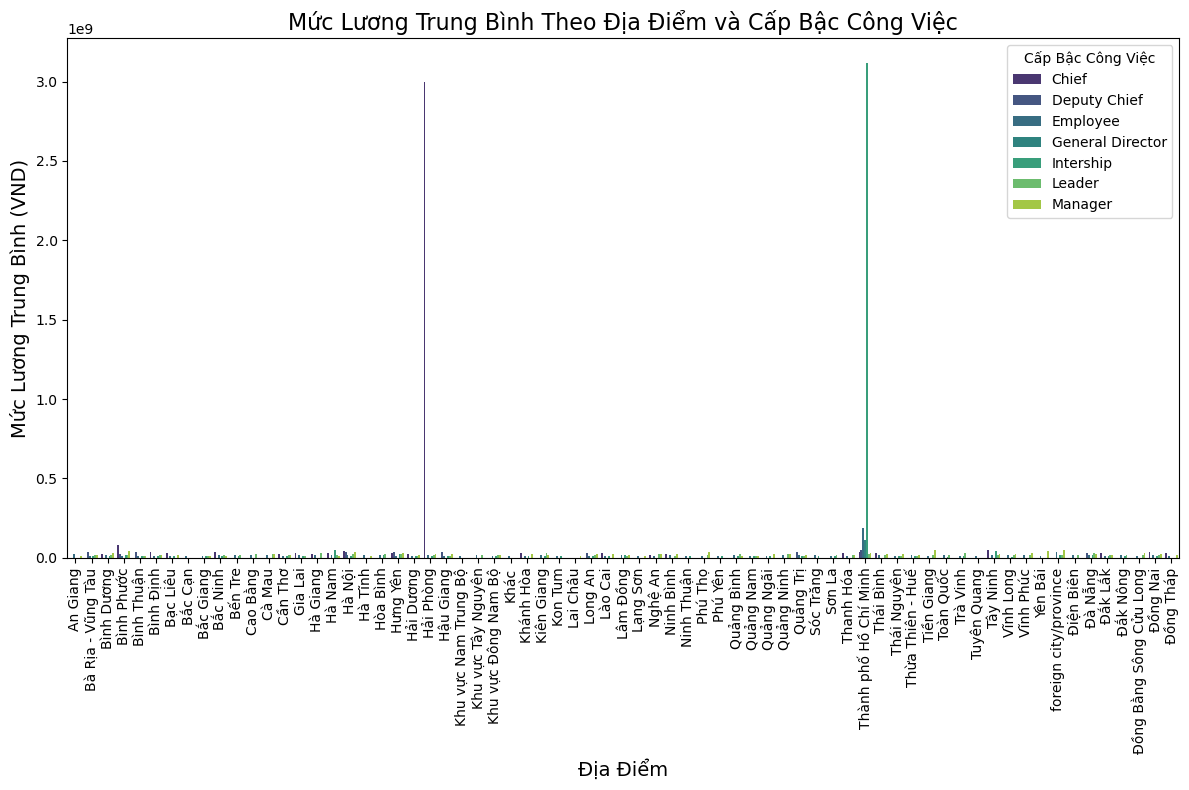

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_salary,
    x='Location',
    y='Average Salary',
    hue='Job Level',
    palette='viridis'
)
plt.title('Mức Lương Trung Bình Theo Địa Điểm và Cấp Bậc Công Việc', fontsize=16)
plt.xlabel('Địa Điểm', fontsize=14)
plt.ylabel('Mức Lương Trung Bình (VND)', fontsize=14)
plt.legend(title='Cấp Bậc Công Việc')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2. Câu hỏi 2 <a id="iv2"></a>

### 3. Câu hỏi 3 <a id="iv3"></a>

### 4. Câu hỏi 4 <a id="iv4"></a>

### 5. Câu hỏi 5 <a id="iv5"></a>

### 6. Câu hỏi 6 <a id="iv6"></a>

### 7. Câu hỏi 7 <a id="iv7"></a>

### 8. Câu hỏi 8 <a id="iv8"></a>

### 9. Câu hỏi 9 <a id="iv9"></a>

### 10. Câu hỏi 10 <a id="iv10"></a>